<a href="https://colab.research.google.com/github/KARTHIKEYAN-NAMADARI/CODSOFT/blob/main/Codesoft_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import Sequential
from keras.layers import Dense, Flatten

In [6]:
df = pd.read_csv("/content/IRIS.csv",encoding='latin-1')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
lb = LabelEncoder()

In [10]:
df['species']= lb.fit_transform(df['species'])

In [11]:
Y = df['species']
X = df.drop(['species'], axis=1).values

print(X.shape)
print(Y.shape)

# input should be of 2D array
X = np.array(X)

(150, 4)
(150,)


In [12]:
Y = to_categorical(Y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_train_scale = sc_X.fit_transform(X_train)
X_test_scale = sc_X.transform(X_test)

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(4,)))
model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))# input shape is (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 739 (2.89 KB)
Trainable params: 739 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train_scale,y_train,epochs=100, batch_size=10,shuffle=True,validation_data=(X_test_scale,y_test))

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 1.1184 - accuracy: 0.2083 - val_loss: 1.0749 - val_accuracy: 0.4667
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0362 - accuracy: 0.5083 - val_loss: 1.0007 - val_accuracy: 0.5667
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9611 - accuracy: 0.7333 - val_loss: 0.9331 - val_accuracy: 0.6333
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8884 - accuracy: 0.8083 - val_loss: 0.8611 - val_accuracy: 0.7333
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.8155 - accuracy: 0.8250 - val_loss: 0.7858 - val_accuracy: 0.7333
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7383 - accuracy: 0.8500 - val_loss: 0.7150 - val_accuracy: 0.7667
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6638 - accuracy: 0.8500 - val_loss: 0.6466 - val_accuracy: 0.7667
Epoch 8/100


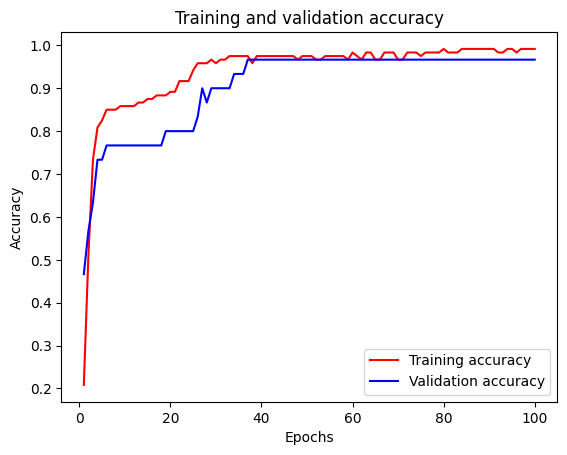

In [17]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X_test_scale) # see how the model did!
print(preds[0])
print(np.sum(preds[0])) # Probabilities

matrix = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))
print(matrix)

print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

1/1 [==============================] - 0s 270ms/step
[9.9892598e-01 1.0740367e-03 1.3611670e-09]
1.0
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

